# Python 資料前處理與EDA

> 第二天

[數聚點](https://www.datainpoint.com) | 郭耀仁 <yaojenkuo@datainpoint.com>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 關於基礎的資料框操作

## （複習）資料導向的分析流程

![](images/data-science-project.png)

來源：<https://r4ds.had.co.nz/introduction.html>

## （沒什麼用的冷知識）Wrangle = Import + Tidy + Transform

![](https://media.giphy.com/media/MnlZWRFHR4xruE4N2Z/giphy.gif)

來源：<https://media.giphy.com/media/MnlZWRFHR4xruE4N2Z/giphy.gif>

## 多數的資料清理、資料外型與類別的轉換是面對 `DataFrame`

（複習）入門 Pandas 的第一步就是掌握 `Index`、`ndarray`、`Series` 與 `DataFrame` 四個資料結構類別彼此之間的關係。

- `Series` 由 `Index` 與 `ndarray` 組合而成。
- `DataFrame` 由數個共享同一個 `Index` 的 `Series` 組合而成。

## `DataFrame` 是有兩個維度的資料結構

- 第一個維度稱為觀測值（Observations），有時亦稱為列（Rows）
- 第二個維度稱為變數（Variables），有時亦稱為欄（Columns）
- 我們習慣以 `(m, n)` 或者 `m x n` 來描述一個具有 `m` 列觀測值、`n` 欄變數的 `DataFrame`

In [2]:
file_url = "https://raw.githubusercontent.com/datainpoint/classroom-nccu-dac/main/movies.csv"
movies = pd.read_csv(file_url)
print(movies.shape)
print(movies.head().shape)
movies.head() # just show the first 5 rows

(250, 6)
(5, 6)


,id,title,release_year,rating,director,runtime
0,1,The Shawshank Redemption,1994,9.3,Frank Darabont,142
1,2,The Godfather,1972,9.2,Francis Ford Coppola,175
2,3,The Godfather: Part II,1974,9.0,Francis Ford Coppola,202
3,4,The Dark Knight,2008,9.0,Christopher Nolan,152
4,5,12 Angry Men,1957,9.0,Sidney Lumet,96


## `DataFrame` 與二維 `ndarray` 不同的地方

- `DataFrame` 的每個變數可以是異質的。
- `DataFrame` 的觀測值具有列標籤（row-label）、變數具有欄標籤（column-label）

In [3]:
print(movies.dtypes)  # heterogeneous 
print(movies.index)   # row-label
print(movies.columns) # column-label

id                int64
title            object
release_year      int64
rating          float64
director         object
runtime           int64
dtype: object
RangeIndex(start=0, stop=250, step=1)
Index(['id', 'title', 'release_year', 'rating', 'director', 'runtime'], dtype='object')


## Pandas 使用更直觀的概念操作資料

- 如何定義「更直觀」？
    - 像操作試算表一般（Spreadsheet-like）
    - 像使用結構化查詢語言一般（SQL-like）

## 選擇欄位

## 以 `DataFrame["column"]` 選擇欄位成為外型 `(m,)` 的 `Series`

In [4]:
print(type(movies["title"]))
print(movies["title"].shape)
movies["title"]

<class 'pandas.core.series.Series'>
(250,)


0                            The Shawshank Redemption
1                                       The Godfather
2                              The Godfather: Part II
3                                     The Dark Knight
4                                        12 Angry Men
                            ...                      
245    Neon Genesis Evangelion: The End of Evangelion
246                                7 Kogustaki Mucize
247                                        Tangerines
248                                          Drishyam
249                                            Swades
Name: title, Length: 250, dtype: object

## 以 `DataFrame[["column"]]` 選擇欄位成為外型 `(m, 1)` 的 `DataFrame`

In [5]:
print(type(movies[["title"]]))
print(movies[["title"]].shape)
movies[["title"]]

<class 'pandas.core.frame.DataFrame'>
(250, 1)


,title
0,The Shawshank Redemption
1,The Godfather
2,The Godfather: Part II
3,The Dark Knight
4,12 Angry Men
...,...
245,Neon Genesis Evangelion: The End of Evangelion
246,7 Kogustaki Mucize
247,Tangerines
248,Drishyam


## 以 `DataFrame[["column_0", "column_1", ...]]` 選擇多個欄位成為外型 `(m, n)` 的 `DataFrame`

運用 Fancy indexing 於欄位的選擇。

In [6]:
movies[["title", "director", "release_year", "rating"]]

,title,director,release_year,rating
0,The Shawshank Redemption,Frank Darabont,1994,9.3
1,The Godfather,Francis Ford Coppola,1972,9.2
2,The Godfather: Part II,Francis Ford Coppola,1974,9.0
3,The Dark Knight,Christopher Nolan,2008,9.0
4,12 Angry Men,Sidney Lumet,1957,9.0
...,...,...,...,...
245,Neon Genesis Evangelion: The End of Evangelion,Hideaki Anno,1997,8.1
246,7 Kogustaki Mucize,Mehmet Ada Öztekin,2019,8.2
247,Tangerines,Zaza Urushadze,2013,8.2
248,Drishyam,Nishikant Kamat,2015,8.2


## 篩選資料列

## 善用 `Series` 的特性

- `Series` 是由 `Index` 與 `ndarray` 組合而成，具備了 `ndarray` 的特性。
- 善用元素操作（Elementwise）運算。
- 善用特殊的 indexing 語法：Fancy indexing/Boolean indexing

## 透過條件敘述以 `DataFrame[booleans]` 篩選資料列

- 運用 Boolean indexing 於資料列的篩選。
- 熟悉之後會直接將條件敘述寫在中括號裡。

In [7]:
boolean_series = movies["director"] == "Peter Jackson"
movies[boolean_series] # movies[movies["director"] == "Peter Jackson"]

,id,title,release_year,rating,director,runtime
6,7,The Lord of the Rings: The Return of the King,2003,8.9,Peter Jackson,201
9,10,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,Peter Jackson,178
13,14,The Lord of the Rings: The Two Towers,2002,8.7,Peter Jackson,179


## 如何負面表列（negate）由 `bool` 組成的 Series

- 使用相反的關係運算符 `==` vs. `!=`
- 使用 `~` 運算符。

In [8]:
boolean_series = movies["director"] != "Peter Jackson"
print(boolean_series.sum())
boolean_series = movies["director"] == "Peter Jackson"
print((~boolean_series).sum())

247
247


## 加入多個條件敘述篩選資料列

- 運用 `&` 運算符**交集**多個條件敘述。
- 運用 `|` 運算符**聯集**多個條件敘述。

## 運用 `&` 運算符交集多個條件敘述

In [9]:
(movies["release_year"] == 1994) & (movies["rating"] >= 8.8)

0       True
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 250, dtype: bool

In [10]:
movies[(movies["release_year"] == 1994) & (movies["rating"] >= 8.8)] # movies released in 1994 with amazing rating score

,id,title,release_year,rating,director,runtime
0,1,The Shawshank Redemption,1994,9.3,Frank Darabont,142
7,8,Pulp Fiction,1994,8.9,Quentin Tarantino,154
11,12,Forrest Gump,1994,8.8,Robert Zemeckis,142


## 運用 `|` 運算符聯集多個條件敘述

In [11]:
(movies["release_year"] == 1994) | (movies["rating"] >= 8.8)

0       True
1       True
2       True
3       True
4       True
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 250, dtype: bool

In [12]:
movies[(movies["release_year"] == 1994) | (movies["rating"] >= 8.8)]

,id,title,release_year,rating,director,runtime
0,1,The Shawshank Redemption,1994,9.3,Frank Darabont,142
1,2,The Godfather,1972,9.2,Francis Ford Coppola,175
2,3,The Godfather: Part II,1974,9.0,Francis Ford Coppola,202
3,4,The Dark Knight,2008,9.0,Christopher Nolan,152
4,5,12 Angry Men,1957,9.0,Sidney Lumet,96
5,6,Schindler's List,1993,8.9,Steven Spielberg,195
6,7,The Lord of the Rings: The Return of the King,2003,8.9,Peter Jackson,201
7,8,Pulp Fiction,1994,8.9,Quentin Tarantino,154
8,9,"The Good, the Bad and the Ugly",1966,8.8,Sergio Leone,178
9,10,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,Peter Jackson,178


## 運用 `Series.isin()` 聯集單一變數的多個條件

In [13]:
movies[movies["director"].isin(["Peter Jackson", "Quentin Tarantino"])]

,id,title,release_year,rating,director,runtime
6,7,The Lord of the Rings: The Return of the King,2003,8.9,Peter Jackson,201
7,8,Pulp Fiction,1994,8.9,Quentin Tarantino,154
9,10,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,Peter Jackson,178
13,14,The Lord of the Rings: The Two Towers,2002,8.7,Peter Jackson,179
56,57,Django Unchained,2012,8.4,Quentin Tarantino,165
84,85,Inglourious Basterds,2009,8.3,Quentin Tarantino,153
88,89,Reservoir Dogs,1992,8.3,Quentin Tarantino,99
173,174,Kill Bill: Vol. 1,2003,8.1,Quentin Tarantino,111


In [14]:
movies[movies["release_year"].isin([1994, 2008])]

,id,title,release_year,rating,director,runtime
0,1,The Shawshank Redemption,1994,9.3,Frank Darabont,142
3,4,The Dark Knight,2008,9.0,Christopher Nolan,152
7,8,Pulp Fiction,1994,8.9,Quentin Tarantino,154
11,12,Forrest Gump,1994,8.8,Robert Zemeckis,142
30,31,Léon: The Professional,1994,8.5,Luc Besson,110
33,34,The Lion King,1994,8.5,Roger Allers,88
60,61,WALL·E,2008,8.4,Andrew Stanton,98
181,182,Gran Torino,2008,8.1,Clint Eastwood,116


## 如何判斷條件敘述的交集或聯集

- 運用語言邏輯思考條件的結合為「和」還是「或」，「和」為交集、「或」為聯集。
- 運用資料列數思考條件的結合要「縮減」還是「擴增」，「縮減」為交集、「擴增」為聯集。

## 排序資料框

## 兩個排序方式

1. 遞增（又稱升冪）排序，預設的排序方式。
2. 遞減（又稱降冪）排序。

## 使用 `DataFrame` 的兩個方法排序

- `DataFrame.sort_index()` 依列標籤排序。
- `DataFrame.sort_values()` 依欄位排序。

## `DataFrame.sort_index()` 依列標籤排序 

預設 `ascending=True`

In [15]:
movies.sort_index()

,id,title,release_year,rating,director,runtime
0,1,The Shawshank Redemption,1994,9.3,Frank Darabont,142
1,2,The Godfather,1972,9.2,Francis Ford Coppola,175
2,3,The Godfather: Part II,1974,9.0,Francis Ford Coppola,202
3,4,The Dark Knight,2008,9.0,Christopher Nolan,152
4,5,12 Angry Men,1957,9.0,Sidney Lumet,96
...,...,...,...,...,...,...
245,246,Neon Genesis Evangelion: The End of Evangelion,1997,8.1,Hideaki Anno,87
246,247,7 Kogustaki Mucize,2019,8.2,Mehmet Ada Öztekin,132
247,248,Tangerines,2013,8.2,Zaza Urushadze,87
248,249,Drishyam,2015,8.2,Nishikant Kamat,163


In [16]:
movies.sort_index(ascending=False)

,id,title,release_year,rating,director,runtime
249,250,Swades,2004,8.2,Ashutosh Gowariker,189
248,249,Drishyam,2015,8.2,Nishikant Kamat,163
247,248,Tangerines,2013,8.2,Zaza Urushadze,87
246,247,7 Kogustaki Mucize,2019,8.2,Mehmet Ada Öztekin,132
245,246,Neon Genesis Evangelion: The End of Evangelion,1997,8.1,Hideaki Anno,87
...,...,...,...,...,...,...
4,5,12 Angry Men,1957,9.0,Sidney Lumet,96
3,4,The Dark Knight,2008,9.0,Christopher Nolan,152
2,3,The Godfather: Part II,1974,9.0,Francis Ford Coppola,202
1,2,The Godfather,1972,9.2,Francis Ford Coppola,175


## `DataFrame.sort_values()` 依欄位排序

- 預設 `ascending=True`
- 數值由小到大、英文由 A 到 Z

In [17]:
movies.sort_values("release_year")

,id,title,release_year,rating,director,runtime
98,99,The Kid,1921,8.3,Charles Chaplin,68
194,195,Sherlock Jr.,1924,8.2,Buster Keaton,45
152,153,The Gold Rush,1925,8.2,Charles Chaplin,95
198,199,The General,1926,8.1,Clyde Bruckman,67
115,116,Metropolis,1927,8.3,Fritz Lang,153
...,...,...,...,...,...,...
246,247,7 Kogustaki Mucize,2019,8.2,Mehmet Ada Öztekin,132
164,165,Klaus,2019,8.2,Sergio Pablos,96
230,231,Soul,2020,8.1,Pete Docter,100
58,59,Hamilton,2020,8.5,Thomas Kail,160


In [18]:
movies.sort_values("release_year", ascending=False)

,id,title,release_year,rating,director,runtime
166,167,Zack Snyder's Justice League,2021,8.3,Zack Snyder,242
58,59,Hamilton,2020,8.5,Thomas Kail,160
230,231,Soul,2020,8.1,Pete Docter,100
75,76,Avengers: Endgame,2019,8.4,Anthony Russo,181
246,247,7 Kogustaki Mucize,2019,8.2,Mehmet Ada Öztekin,132
...,...,...,...,...,...,...
115,116,Metropolis,1927,8.3,Fritz Lang,153
198,199,The General,1926,8.1,Clyde Bruckman,67
152,153,The Gold Rush,1925,8.2,Charles Chaplin,95
194,195,Sherlock Jr.,1924,8.2,Buster Keaton,45


## 傳入 `list` 指定多個欄位與排序方式

In [19]:
movies.sort_values(["release_year", "title"], ascending=[False, True])

,id,title,release_year,rating,director,runtime
166,167,Zack Snyder's Justice League,2021,8.3,Zack Snyder,242
58,59,Hamilton,2020,8.5,Thomas Kail,160
230,231,Soul,2020,8.1,Pete Docter,100
107,108,1917,2019,8.3,Sam Mendes,119
246,247,7 Kogustaki Mucize,2019,8.2,Mehmet Ada Öztekin,132
...,...,...,...,...,...,...
115,116,Metropolis,1927,8.3,Fritz Lang,153
198,199,The General,1926,8.1,Clyde Bruckman,67
152,153,The Gold Rush,1925,8.2,Charles Chaplin,95
194,195,Sherlock Jr.,1924,8.2,Buster Keaton,45


## 分組聚合欄位

## 使用 `Series` 的聚合方法取得欄位摘要

- `Series.count()` 不含未定義值的列數
- `Series.sum()` 加總
- `Series.max()` 最大值
- `Series.min()` 最小值
- `Series.mean()` 平均
- ...等。

## 片長 `runtime` 的摘要

In [20]:
print(movies["runtime"].max())
print(movies["runtime"].min())

321
45


## IMDb 評等 `rating` 的摘要

In [21]:
print(movies["rating"].max())
print(movies["rating"].min())
print(movies["rating"].mean())

9.3
8.1
8.305199999999969


## 使用 `DataFrame.groupby()` 獲得排序後的獨一值 `DataFrameGroupBy` 類別

In [22]:
print(movies.groupby("director"))

## 分組後接續選擇欄位以及聚合方法

In [23]:
movies.groupby("director")["title"].count() # number of movies by director

director
Aamir Khan               1
Adam Elliot              1
Akira Kurosawa           6
Alejandro G. Iñárritu    1
Alfred Hitchcock         6
                        ..
Yasujirô Ozu             1
Yavuz Turgul             1
Zack Snyder              1
Zaza Urushadze           1
Çagan Irmak              1
Name: title, Length: 157, dtype: int64

In [24]:
movies.groupby("director")["rating"].mean() # average rating by director

director
Aamir Khan               8.400000
Adam Elliot              8.100000
Akira Kurosawa           8.316667
Alejandro G. Iñárritu    8.100000
Alfred Hitchcock         8.300000
                           ...   
Yasujirô Ozu             8.200000
Yavuz Turgul             8.200000
Zack Snyder              8.300000
Zaza Urushadze           8.200000
Çagan Irmak              8.300000
Name: rating, Length: 157, dtype: float64

## 衍生計算欄位

## 善用三個技巧衍生計算欄位

1. 元素操作（Elementwise）運算。
2. 使用函數或 `Series` 的方法。
3. 使用 `Series.map()`

## 元素操作（Elementwise）運算

In [25]:
print(movies["runtime"] // 60) # hours
print(movies["runtime"] % 60)  # minutes

0      2
1      2
2      3
3      2
4      1
      ..
245    1
246    2
247    1
248    2
249    3
Name: runtime, Length: 250, dtype: int64
0      22
1      55
2      22
3      32
4      36
       ..
245    27
246    12
247    27
248    43
249     9
Name: runtime, Length: 250, dtype: int64


## 使用函數或 `Series` 的方法

In [26]:
hours = (movies["runtime"] // 60).astype(str)
minutes = (movies["runtime"] % 60).astype(str)
hours.str.cat(minutes, sep=":") # hours:minutes

0      2:22
1      2:55
2      3:22
3      2:32
4      1:36
       ... 
245    1:27
246    2:12
247    1:27
248    2:43
249     3:9
Name: runtime, Length: 250, dtype: object

## 使用 `Series.map()`

In [27]:
def mins_to_hourmins(x: int) -> str:
    hours = str(x // 60)
    minutes = str(x % 60)
    return f"{hours.zfill(2)}:{minutes.zfill(2)}" # 2 digits zero-filled

runtime_hours_mins = movies["runtime"].map(mins_to_hourmins)
runtime_hours_mins

0      02:22
1      02:55
2      03:22
3      02:32
4      01:36
       ...  
245    01:27
246    02:12
247    01:27
248    02:43
249    03:09
Name: runtime, Length: 250, dtype: object

## 使用 `DataFrame.insert()` 新增變數

留意 `DataFrame.insert()` 更新的機制是更新物件本身並回傳 `None`

In [28]:
print(movies.columns)
n = movies.shape[1]
movies.insert(n, "runtime_hours_mins", runtime_hours_mins)
print(movies.columns)
movies.head()

Index(['id', 'title', 'release_year', 'rating', 'director', 'runtime'], dtype='object')
Index(['id', 'title', 'release_year', 'rating', 'director', 'runtime',
       'runtime_hours_mins'],
      dtype='object')


,id,title,release_year,rating,director,runtime,runtime_hours_mins
0,1,The Shawshank Redemption,1994,9.3,Frank Darabont,142,02:22
1,2,The Godfather,1972,9.2,Francis Ford Coppola,175,02:55
2,3,The Godfather: Part II,1974,9.0,Francis Ford Coppola,202,03:22
3,4,The Dark Knight,2008,9.0,Christopher Nolan,152,02:32
4,5,12 Angry Men,1957,9.0,Sidney Lumet,96,01:36


## 處理多個變數的分組聚合結果

如果在 `DataFrame.groupby()` 輸入了多個變數作為分組依據 `[column_0, column_1, ...]` 輸出的 `Series` 會有特殊的 `MultiIndex` 類別。

In [29]:
movies = pd.read_csv(file_url)
movies_by_year_director = movies.groupby(["release_year", "director"])["title"].count()
movies_by_year_director.index

MultiIndex([(1921,     'Charles Chaplin'),
            (1924,       'Buster Keaton'),
            (1925,     'Charles Chaplin'),
            (1926,      'Clyde Bruckman'),
            (1927,          'Fritz Lang'),
            (1928, 'Carl Theodor Dreyer'),
            (1931,     'Charles Chaplin'),
            (1931,          'Fritz Lang'),
            (1934,         'Frank Capra'),
            (1936,     'Charles Chaplin'),
            ...
            (2019,        'Bong Joon Ho'),
            (2019,      'Céline Sciamma'),
            (2019,       'James Mangold'),
            (2019,  'Mehmet Ada Öztekin'),
            (2019,          'Sam Mendes'),
            (2019,       'Sergio Pablos'),
            (2019,       'Todd Phillips'),
            (2020,         'Pete Docter'),
            (2020,         'Thomas Kail'),
            (2021,         'Zack Snyder')],
           names=['release_year', 'director'], length=247)

## 如何操作 `MultiIndex` 類別

- 以操作 `tuple` 的方式面對 `MultiIndex` 類別。
- 使用 `DataFrame.reset_index()` 重設列標籤。

## 以操作 `tuple` 的方式面對 `MultiIndex` 類別

In [30]:
movies_by_year_director[(2008, )]

director
Andrew Stanton       1
Christopher Nolan    1
Clint Eastwood       1
Name: title, dtype: int64

In [31]:
movies_by_year_director[(2008, "Christopher Nolan")]

1

## 使用 `DataFrame.reset_index()` 重設列標籤

In [32]:
movies_by_year_director.reset_index()

,release_year,director,title
0,1921,Charles Chaplin,1
1,1924,Buster Keaton,1
2,1925,Charles Chaplin,1
3,1926,Clyde Bruckman,1
4,1927,Fritz Lang,1
...,...,...,...
242,2019,Sergio Pablos,1
243,2019,Todd Phillips,1
244,2020,Pete Docter,1
245,2020,Thomas Kail,1


## 進階的資料框操作

## 進階的資料框操作包含

- 迭代資料框的列或欄。
- 處理未定義值。
- 轉置資料框。
- 單純合併資料框。
- 關聯資料框。

## 如何迭代資料框的欄

使用 `DataFrame.iteritems()` 同時取得欄標籤以及變數（`Series` 形式）

In [33]:
movies = pd.read_csv(file_url)
print(movies.dtypes)

id                int64
title            object
release_year      int64
rating          float64
director         object
runtime           int64
dtype: object


In [34]:
for column_label, series in movies.iteritems():
    print(f"{column_label}: {series.dtype}: {type(series)}")

id: int64: <class 'pandas.core.series.Series'>
title: object: <class 'pandas.core.series.Series'>
release_year: int64: <class 'pandas.core.series.Series'>
rating: float64: <class 'pandas.core.series.Series'>
director: object: <class 'pandas.core.series.Series'>
runtime: int64: <class 'pandas.core.series.Series'>


## 如何迭代資料框的列

使用 `DataFrame.iterrows()` 同時取得列標籤以及對應的觀測值（`Series` 形式）。

In [35]:
for row_label, series in movies.head().iterrows(): # iterate the first 5 rows of movies
    print(f"{row_label}: {series.values}: {type(series)}")

0: [1 'The Shawshank Redemption' 1994 9.3 'Frank Darabont' 142]: <class 'pandas.core.series.Series'>
1: [2 'The Godfather' 1972 9.2 'Francis Ford Coppola' 175]: <class 'pandas.core.series.Series'>
2: [3 'The Godfather: Part II' 1974 9.0 'Francis Ford Coppola' 202]: <class 'pandas.core.series.Series'>
3: [4 'The Dark Knight' 2008 9.0 'Christopher Nolan' 152]: <class 'pandas.core.series.Series'>
4: [5 '12 Angry Men' 1957 9.0 'Sidney Lumet' 96]: <class 'pandas.core.series.Series'>


## 常見未定義值的處理方式

- 檢查未定義值是否存在。
- 刪除未定義值。
- 填補未定義值。

## 不能使用 `Series == np.nan` 來檢查未定義值是否存在

In [36]:
series_with_npnan = pd.Series([2, 3, np.nan, 7, 11, np.nan, 17, 19])
series_with_npnan == np.nan

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

## 使用 `Series.isnull()` 或者 `Series.notnull()` 檢查未定義值是否存在

In [37]:
series_with_npnan.isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
dtype: bool

In [38]:
series_with_npnan.notnull() # ~(series_with_npnan.isnull())

0     True
1     True
2    False
3     True
4     True
5    False
6     True
7     True
dtype: bool

## 使用 `Series.dropna()` 刪除

In [39]:
series_with_npnan = pd.Series([2, 3, np.nan, 7, 11, np.nan, 17, 19])
series_with_npnan.dropna()

0     2.0
1     3.0
3     7.0
4    11.0
6    17.0
7    19.0
dtype: float64

## 使用 `DataFrame.dropna()` 刪除有未定義值的資料列或欄位

- 因為資料框的外型是 `(m, n)` 因此必須整個資料列或欄位都刪除。
- `axis` 參數預設為 `axis=0` 刪除有未定義值的資料列，指定參數 `axis=1` 刪除有未定義值的欄位。
- 指定參數 `how="any"` 只要資料列或欄位有一個 `np.nan` 就將整個資料列或欄位刪除。
- 指定參數 `how="all"` 必須資料列或欄位全部都是 `np.nan` 才刪除。

In [40]:
dataframe_with_npnan = pd.DataFrame()
dataframe_with_npnan["column_0"] = [2, 3, 5, 7, 11, np.nan]
dataframe_with_npnan["column_1"] = [2, np.nan, 5, np.nan, 11, np.nan]
dataframe_with_npnan["column_2"] = [2, 3, np.nan, 7, np.nan, np.nan]
dataframe_with_npnan

,column_0,column_1,column_2
0,2.0,2.0,2.0
1,3.0,NaN,3.0
2,5.0,5.0,NaN
3,7.0,NaN,7.0
4,11.0,11.0,NaN
5,NaN,NaN,NaN


## 刪除有未定義值的資料列

In [41]:
dataframe_with_npnan.dropna()

,column_0,column_1,column_2
0,2.0,2.0,2.0


In [42]:
dataframe_with_npnan.dropna(how="all")

,column_0,column_1,column_2
0,2.0,2.0,2.0
1,3.0,NaN,3.0
2,5.0,5.0,NaN
3,7.0,NaN,7.0
4,11.0,11.0,NaN


## 刪除有未定義值的欄位

In [43]:
dataframe_with_npnan = pd.DataFrame()
dataframe_with_npnan["column_0"] = [2, 3, 5, 7, 11, 13]
dataframe_with_npnan["column_1"] = [2, np.nan, 5, np.nan, 11, np.nan]
dataframe_with_npnan["column_2"] = [2, 3, np.nan, 7, np.nan, np.nan]
dataframe_with_npnan["column_3"] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
dataframe_with_npnan

,column_0,column_1,column_2,column_3
0,2,2.0,2.0,NaN
1,3,NaN,3.0,NaN
2,5,5.0,NaN,NaN
3,7,NaN,7.0,NaN
4,11,11.0,NaN,NaN
5,13,NaN,NaN,NaN


In [44]:
dataframe_with_npnan.dropna(axis=1)

,column_0
0,2
1,3
2,5
3,7
4,11
5,13


In [45]:
dataframe_with_npnan.dropna(axis=1, how="all")

,column_0,column_1,column_2
0,2,2.0,2.0
1,3,NaN,3.0
2,5,5.0,NaN
3,7,NaN,7.0
4,11,11.0,NaN
5,13,NaN,NaN


## 使用 `Series.fillna()` 填補未定義值為指定資料

In [46]:
series_with_npnan = pd.Series([2, 3, np.nan, 7, 11, np.nan, np.nan, 19])
series_with_npnan.fillna(5566)

0       2.0
1       3.0
2    5566.0
3       7.0
4      11.0
5    5566.0
6    5566.0
7      19.0
dtype: float64

## 使用 `Series.fillna()` 的參數 `method`

- `method="ffill"`(forward-fill)遇到未定義值就用前一個值來填補。
- `method="bfill"`(backward-fill)遇到未定義值就用後一個值來填補。

In [47]:
series_with_npnan.fillna(method="ffill")

0     2.0
1     3.0
2     3.0
3     7.0
4    11.0
5    11.0
6    11.0
7    19.0
dtype: float64

In [48]:
series_with_npnan.fillna(method="bfill")

0     2.0
1     3.0
2     7.0
3     7.0
4    11.0
5    19.0
6    19.0
7    19.0
dtype: float64

## 轉置資料框的函數與方法

- `pd.melt()` 函數可以將資料框由寬格式轉換為長格式。
- `DataFrame.pivot()` 可以將資料框由長格式轉換為寬格式。

## 什麼是寬格式、長格式

- 寬格式使用一個欄位儲存資料，欄位名稱記錄變數類別、觀測值記錄數值。 
- 長格式使用兩個欄位儲存資料，一個欄位記錄變數類別、一個欄位記錄數值。

來源：<https://en.wikipedia.org/wiki/Wide_and_narrow_data>

## 寬格式使用欄位名稱記錄變數類別、觀測值記錄其數值

In [49]:
persons = ["Bob", "Alice", "Steve"]
ages = [32, 24, 64]
weights = [168, 150, 144]
heights = [180, 175, 165]
wide_format = pd.DataFrame()
wide_format["Person"] = persons
wide_format["Age"] = ages
wide_format["Weight"] = weights
wide_format["Height"] = heights
wide_format

,Person,Age,Weight,Height
0,Bob,32,168,180
1,Alice,24,150,175
2,Steve,64,144,165


## 長格式使用一個欄位記錄變數類別、一個欄位記錄數值

In [50]:
long_format = pd.melt(wide_format, 
                      id_vars="Person", value_vars=["Age", "Weight", "Height"],
                      var_name="Variable", value_name="Value")

In [51]:
long_format

,Person,Variable,Value
0,Bob,Age,32
1,Alice,Age,24
2,Steve,Age,64
3,Bob,Weight,168
4,Alice,Weight,150
5,Steve,Weight,144
6,Bob,Height,180
7,Alice,Height,175
8,Steve,Height,165


## `pd.melt()` 函數可以將資料框由寬格式轉換為長格式

- `id_vars` 參數指定非數值的欄位。
- `value_vars` 參數指定數值的欄位，預設指定 `id_vars` 以外的所有欄位。
- `var_name` 參數指定變數類別的欄標籤。
- `value_name` 參數指定數值的欄標籤。

In [52]:
pd.melt(wide_format, id_vars="Person", var_name="Variable", value_name="Value") # value_vars=["Age", "Weight", "Height"]

,Person,Variable,Value
0,Bob,Age,32
1,Alice,Age,24
2,Steve,Age,64
3,Bob,Weight,168
4,Alice,Weight,150
5,Steve,Weight,144
6,Bob,Height,180
7,Alice,Height,175
8,Steve,Height,165


## `DataFrame.pivot()` 可以將資料框由長格式轉換為寬格式

- `index` 參數指定非數值的欄位。
- `columns` 參數指定變數類別，對應 `pd.melt()` 的 `var_name`
- `values` 參數指定數值，對應 `pd.melt()` 的 `value_name`

In [53]:
long_format.pivot(index="Person", columns="Variable", values="Value")

Variable,Age,Height,Weight
Person,,,
Alice,24,175,150
Bob,32,180,168
Steve,64,165,144


## 為何需要轉置資料框

- 資料框的欄位名稱含有使用者需要的資料值。
- 儲存格式與應用情境不符。

## 單純合併資料框的函數與方法

- 使用 `DataFrame.append()` 單純垂直合併。
- 使用 `pd.concat()` 函數單純垂直與水平合併。

## 要進行單純垂直合併的資料框

In [54]:
upper_df = pd.DataFrame()
upper_df["title"] = ["The Lord of the Rings: The Fellowship of the Rings"]
upper_df["release_year"] = [2001]
upper_df

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001


In [55]:
lower_df = pd.DataFrame()
lower_df["title"] = ["The Lord of the Rings: The Two Towers", "The Lord of the Rings: The Return of the King"]
lower_df["release_year"] = [2002, 2003]
lower_df

,title,release_year
0,The Lord of the Rings: The Two Towers,2002
1,The Lord of the Rings: The Return of the King,2003


## 使用 `pd.concat()` 函數單純垂直與水平合併

- 將要合併的資料框以結構傳入。
- 參數預設 `axis=0` 單純垂直合併。 
- 預設不會重設列標籤，可以指定參數 `ignore_index=True` 重設列標籤

In [56]:
pd.concat((upper_df, lower_df))

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001
0,The Lord of the Rings: The Two Towers,2002
1,The Lord of the Rings: The Return of the King,2003


In [57]:
pd.concat((upper_df, lower_df), ignore_index=True)

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001
1,The Lord of the Rings: The Two Towers,2002
2,The Lord of the Rings: The Return of the King,2003


## 要進行單純水平合併的資料框

In [58]:
left_df = pd.DataFrame()
left_df["title"] = ["The Lord of the Rings: The Fellowship of the Rings", "The Lord of the Rings: The Two Towers", "The Lord of the Rings: The Return of the King"]
left_df

,title
0,The Lord of the Rings: The Fellowship of the R...
1,The Lord of the Rings: The Two Towers
2,The Lord of the Rings: The Return of the King


In [59]:
right_df = pd.DataFrame()
right_df["release_year"] = [2001, 2002, 2003]
right_df

,release_year
0,2001
1,2002
2,2003


## 參數指定 `axis=1` 單純水平合併

In [60]:
pd.concat((left_df, right_df), axis=1)

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001
1,The Lord of the Rings: The Two Towers,2002
2,The Lord of the Rings: The Return of the King,2003


## 什麼是關聯資料框

資料框的列標籤、欄標籤都是 `Index` 類別，由於 `Index` 類別支援集合運算的特性，因此資料框之間能夠進行觀測值與變數的交集、聯集的運算，實踐類似資料庫的關聯式模型，包含與交集對應的內部連接（Inner join）、左外部連接（Left join）、右外部連接（Right join）以及與聯集對應的全外部連接（Full join）。

## 四種連接

1. 內部連接（Inner join），保留兩個關聯資料框交集的觀測值。
2. 左外部連接（Left join），保留左資料框所有的觀測值以及兩個關聯資料框交集的觀測值。
3. 右外部連接（Right join），保留右資料框所有的觀測值以及兩個關聯資料框交集的觀測值。
4. 全外部連接（Full join），保留兩個關聯資料框聯集的觀測值。

## 關聯資料框的函數與方法

- 使用 `pd.merge()` 函數利用欄標籤進行四種連接。
- 使用 `DataFrame.join()` 利用列標籤進行四種連接。

## 欲關聯的兩個資料框

In [61]:
left_df = pd.DataFrame()
left_df["title"] = ["The Shawshank Redemption", "The Dark Knight", "The Lord of the Rings: The Return of the King", "Schindler's List", "Forrest Gump"]
left_df["rating"] = [9.3, 9.0, 8.9, 8.9, 8.8]
left_df

,title,rating
0,The Shawshank Redemption,9.3
1,The Dark Knight,9.0
2,The Lord of the Rings: The Return of the King,8.9
3,Schindler's List,8.9
4,Forrest Gump,8.8


In [62]:
right_df = pd.DataFrame()
right_df["title"] = ["The Lord of the Rings: The Fellowship of the Rings", "The Lord of the Rings: The Two Towers", "The Lord of the Rings: The Return of the King", "Batman Begins", "The Dark Knight", "The Dark Knight Rises"]
right_df["release_year"] = [2001, 2002, 2003, 2005, 2008, 2012]
right_df

,title,release_year
0,The Lord of the Rings: The Fellowship of the R...,2001
1,The Lord of the Rings: The Two Towers,2002
2,The Lord of the Rings: The Return of the King,2003
3,Batman Begins,2005
4,The Dark Knight,2008
5,The Dark Knight Rises,2012


## 使用 `pd.merge()` 函數利用欄標籤進行四種連接

In [63]:
# default: inner join
pd.merge(left_df, right_df)

,title,rating,release_year
0,The Dark Knight,9.0,2008
1,The Lord of the Rings: The Return of the King,8.9,2003


In [64]:
# left join
pd.merge(left_df, right_df, how='left')

,title,rating,release_year
0,The Shawshank Redemption,9.3,NaN
1,The Dark Knight,9.0,2008.0
2,The Lord of the Rings: The Return of the King,8.9,2003.0
3,Schindler's List,8.9,NaN
4,Forrest Gump,8.8,NaN


In [65]:
# right join
pd.merge(left_df, right_df, how='right')

,title,rating,release_year
0,The Lord of the Rings: The Fellowship of the R...,NaN,2001
1,The Lord of the Rings: The Two Towers,NaN,2002
2,The Lord of the Rings: The Return of the King,8.9,2003
3,Batman Begins,NaN,2005
4,The Dark Knight,9.0,2008
5,The Dark Knight Rises,NaN,2012


In [66]:
# full join
pd.merge(left_df, right_df, how='outer')

,title,rating,release_year
0,The Shawshank Redemption,9.3,NaN
1,The Dark Knight,9.0,2008.0
2,The Lord of the Rings: The Return of the King,8.9,2003.0
3,Schindler's List,8.9,NaN
4,Forrest Gump,8.8,NaN
5,The Lord of the Rings: The Fellowship of the R...,NaN,2001.0
6,The Lord of the Rings: The Two Towers,NaN,2002.0
7,Batman Begins,NaN,2005.0
8,The Dark Knight Rises,NaN,2012.0


## 使用 `DataFrame.join()` 利用列標籤進行四種連接

In [67]:
# default: left join
left_df.set_index('title').join(right_df.set_index('title'))

,rating,release_year
title,,
The Shawshank Redemption,9.3,NaN
The Dark Knight,9.0,2008.0
The Lord of the Rings: The Return of the King,8.9,2003.0
Schindler's List,8.9,NaN
Forrest Gump,8.8,NaN


In [68]:
# inner join
left_df.set_index('title').join(right_df.set_index('title'), how="inner")

,rating,release_year
title,,
The Dark Knight,9.0,2008
The Lord of the Rings: The Return of the King,8.9,2003


In [69]:
# right join
left_df.set_index('title').join(right_df.set_index('title'), how="right")

,rating,release_year
title,,
The Lord of the Rings: The Fellowship of the Rings,NaN,2001
The Lord of the Rings: The Two Towers,NaN,2002
The Lord of the Rings: The Return of the King,8.9,2003
Batman Begins,NaN,2005
The Dark Knight,9.0,2008
The Dark Knight Rises,NaN,2012


In [70]:
# outer join
left_df.set_index('title').join(right_df.set_index('title'), how="outer")

,rating,release_year
title,,
Batman Begins,NaN,2005.0
Forrest Gump,8.8,NaN
Schindler's List,8.9,NaN
The Dark Knight,9.0,2008.0
The Dark Knight Rises,NaN,2012.0
The Lord of the Rings: The Fellowship of the Rings,NaN,2001.0
The Lord of the Rings: The Return of the King,8.9,2003.0
The Lord of the Rings: The Two Towers,NaN,2002.0
The Shawshank Redemption,9.3,NaN


## 關於 Matplotlib

## 什麼是 Matplotlib

> Matplotlib 是 Python 資料視覺化的第三方模組。

來源：<https://matplotlib.org>

## （沒什麼用的冷知識）Matplotlib 與 Matlab 有一點關係

- Matrix plotting library.
- 模仿 Matlab 作圖的指令與功能。

來源：<https://matplotlib.org/stable/users/project/history.html>

## 根據說明文件的範例載入

實際上主要在使用的是 `matplotlib.pyplot`

來源：<https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py>

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## 如果環境中沒有安裝 Matplotlib，載入時會遭遇 `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'matplotlib'
```

## 如果遭遇 `ModuleNotFoundError` 可以在終端機使用 `pip install matplotlib` 或者 `conda install matplotlib` 指令安裝

若要指定模組版本可以加上 `==MAJOR.MINOR.PATCH`

```bash
pip install matplotlib==MAJOR.MINOR.PATCH
```
或者

```bash
conda install matplotlib==MAJOR.MINOR.PATCH
```

## 可以透過兩個屬性檢查版本號與安裝路徑

- `__version__` 屬性檢查版本號。
- `__file__` 屬性檢查安裝路徑。

In [72]:
print(mpl.__version__)
print(mpl.__file__)

3.5.2
/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/matplotlib/__init__.py


## 兩種語法

## 新手學習 Matplotlib 的最大挑戰：兩種不同的作圖語法

1. Matlab 風格。
2. 物件導向風格。

## Matlab 風格

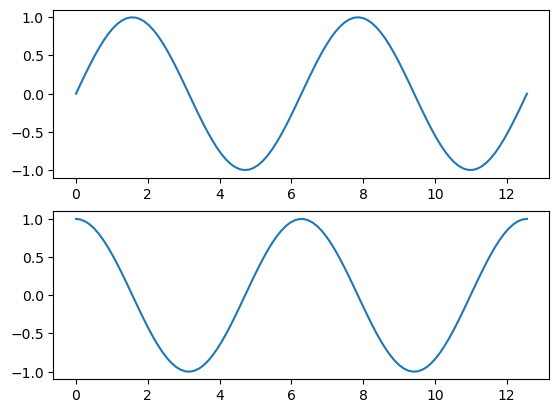

In [73]:
x = np.linspace(0, np.pi*4, 100)
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.show()

## Matlab 風格的優缺點

- 優點：指令式語法，比較直觀。
- 缺點：狀態型介面，需要依程式碼順序閱讀才能理解。

## 物件導向風格

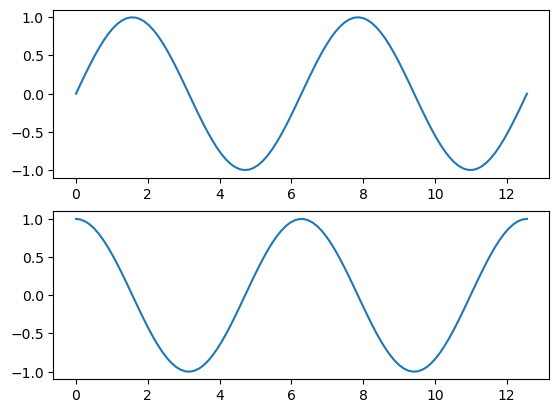

In [74]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(x, np.sin(x))
axes[1].plot(x, np.cos(x))
plt.show()

## 物件導向風格的優缺點

- 優點：物件型介面，不需要依程式碼順序閱讀也能理解。
- 缺點：對不熟悉物件導向概念的人不友善。

## 視覺化五步驟

## 視覺化的標準五步驟

1. 準備資料。
2. 建立「畫布物件」與「軸物件」。
3. 使用「軸物件」的作圖方法建立主要圖形。
4. 使用「軸物件」的作圖方法添加圖形元素。
5. 顯示或者儲存圖形。

## 準備資料

In [75]:
x = np.linspace(0, np.pi*2, 100)
sinx = np.sin(x)

## 建立「畫布物件」與「軸物件」

使用 `plt.subplots()` 函數。

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


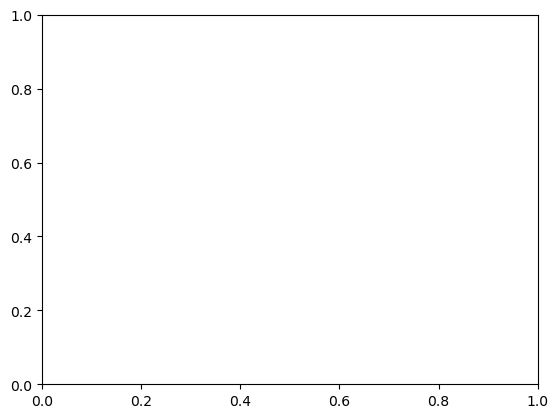

In [76]:
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))

## 使用「軸物件」的作圖方法建立主要圖形

`AxesSubplot.plot()` 能夠建立線圖。

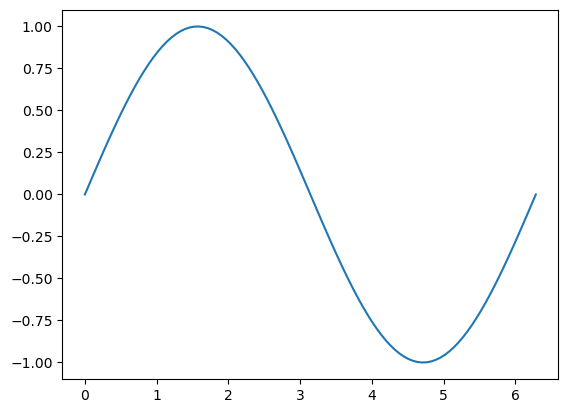

In [77]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)

## 使用「軸物件」的作圖方法添加圖形元素

(-5.0, 5.0)

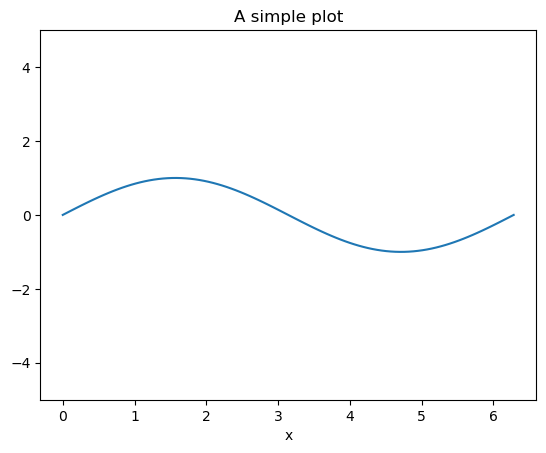

In [78]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('A simple plot')
ax.set_xlabel('x')
ax.set_ylim(-5, 5)

## 顯示圖形

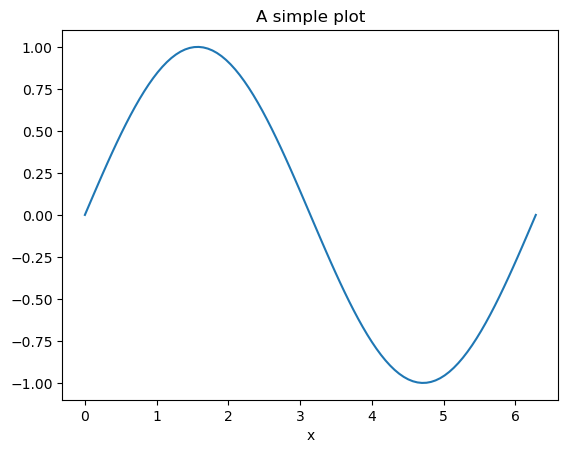

In [79]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('A simple plot')
ax.set_xlabel('x')
plt.show()

## 儲存圖形：可支援的圖片格式

In [80]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 640x480 with 0 Axes>

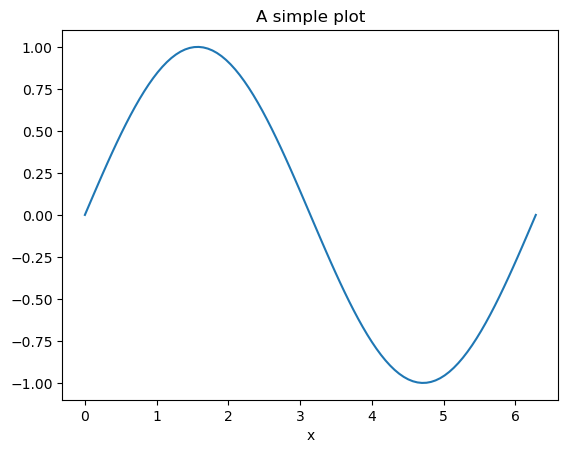

In [81]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('A simple plot')
ax.set_xlabel('x')
fig.savefig('a_simple_plot.png')

## 中文字（非歐美文字）顯示問題解決

## 如何調整中文字型無法顯示的問題

Matplotlib 預設使用的字體不支援中文、日文、韓文等非歐美語系文字。

/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31777 (\N{CJK UNIFIED IDEOGRAPH-7C21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kuoyaojen/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24418 (\N{CJK

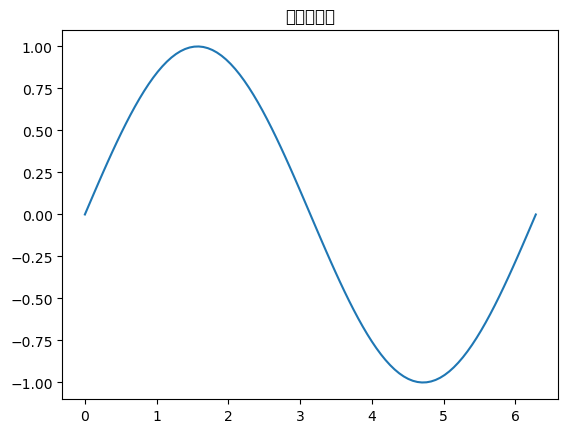

In [82]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('簡單的圖形')
plt.show()

## 指定可以支援中文字體的字型

使用 `matplotlib.font_manager` 的 `FontProperties()` 函數。

```python
from matplotlib.font_manager import FontProperties

msjh = FontProperties(fname="msjh.ttc") # Font supports traditional Chinese
fig = plt.figure()
ax = plt.axes()
ax.plot(x, sinx)
ax.set_title('簡單的圖形', fontproperties=msjh)
plt.show()
```

## 實作練習

## 載入 `kaggle_survey_2022_responses.csv`：`pd.read_csv()`

來源：<https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html>

In [83]:
file_url = "https://raw.githubusercontent.com/datainpoint/classroom-nccu-dac/main/kaggle_survey_2022_responses.csv"
first_two_lines = pd.read_csv(file_url, nrows=1)
temp_df = pd.read_csv(file_url, skiprows=[1], low_memory=False)
survey_data = temp_df.drop('Duration (in seconds)', axis=1)
first_two_lines

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...


In [84]:
survey_data.head()

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,Udacity,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [85]:
question_indices = [col_name[0] for col_name in survey_data.columns.str.split("_")]
question_descriptions = first_two_lines.values.ravel()[1:]
tidy_question_descriptions = [desc.split(" - ")[0] for desc in question_descriptions]
unique_question_indices = pd.Series(question_indices).unique()
unique_question_descriptions = pd.Series(tidy_question_descriptions).unique()
question_types = ["Multiple Response" if "(Select all that apply)" in desc else "Multiple Choice" for desc in unique_question_descriptions]
question_table = pd.DataFrame()
question_table["question_index"] = unique_question_indices
question_table["question_type"] = question_types
question_table["question_description"] = unique_question_descriptions
question_table.head()

,question_index,question_type,question_description
0,Q2,Multiple Choice,What is your age (# years)?
1,Q3,Multiple Choice,What is your gender?
2,Q4,Multiple Choice,In which country do you currently reside?
3,Q5,Multiple Choice,"Are you currently a student? (high school, uni..."
4,Q6,Multiple Response,On which platforms have you begun or completed...


## 檢視題目類型：`Ser.value_counts()`

來源：<https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html>

In [86]:
# Types of question
question_table["question_type"].value_counts()

Multiple Response    24
Multiple Choice      19
Name: question_type, dtype: int64

## 檢視職稱：`Ser.value_counts()`

來源：<https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html>

In [87]:
# Respondant titles
survey_data["Q23"].value_counts()

Data Scientist                                                      1929
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    1538
Currently not employed                                              1432
Software Engineer                                                    980
Teacher / professor                                                  833
Manager (Program, Project, Operations, Executive-level, etc)         832
Other                                                                754
Research Scientist                                                   593
Machine Learning/ MLops Engineer                                     571
Engineer (non-software)                                              465
Data Engineer                                                        352
Statistician                                                         125
Data Architect                                                        95
Data Administrator                                 

## 篩選資料分析師：`df[boolean_series]`

In [88]:
# Filtering Data Analysts out
boolean_series = survey_data["Q23"] == "Data Analyst (Business, Marketing, Financial, Quantitative, etc)"
survey_data_analysts = survey_data[boolean_series]
survey_data_analysts.shape[0]

1538

## 完成函數：`summarize_survey_response()`

In [89]:
def summarize_survey_response(survey_data: pd.core.frame.DataFrame, question_index: str, job_title: str="Data Analyst (Business, Marketing, Financial, Quantitative, etc)", order_by_value: bool=True, show_value_counts: bool=True) -> pd.Series:
    """
    Returns a Series of question summaries in value counts or percentages.
    """
    filtered_survey_data = survey_data[survey_data["Q23"] == job_title] # Filtering Data Analysts out
    column_names = filtered_survey_data.columns # extract column names
    column_names_split = column_names.str.split("_")
    equals_question_index = [True if column[0] == question_index else False for column in column_names_split]
    selected_columns = column_names[equals_question_index]
    selected_survey_data = filtered_survey_data[selected_columns]
    stacked_series = selected_survey_data.stack()
    response_summary = stacked_series.value_counts().sort_values()
    if not order_by_value:
        response_summary = response_summary.sort_index()
    if not show_value_counts:
        response_summary = response_summary / response_summary.sum()
    return response_summary

In [90]:
def plot_response_summary(question_table: pd.core.frame.DataFrame, response_summary: pd.core.series.Series, question_index: str, n: int=3) -> plt.figure:
    """
    Plots a horizontal(default)/vertical bar for a given question index.
    """
    fig = plt.figure() # Create a figure object
    ax = plt.axes()    # Create an axes object
    y = response_summary.index
    width = response_summary.values
    colors = ['c' for _ in range(y.size)]
    colors[-n:] = list('r'*n)
    ax.barh(y, width, color=colors) # Call .barh() method of axes object
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(length=0)
    nth_unique_question = question_table[question_table['question_index'] == question_index]
    question_description = nth_unique_question['question_description'].values[0]
    ax.set_title(question_description)
    plt.show()

## 探索資料分析師的主要工作內容

> Q28: Select any activities that make up an important part of your role at work: (Select all that apply)

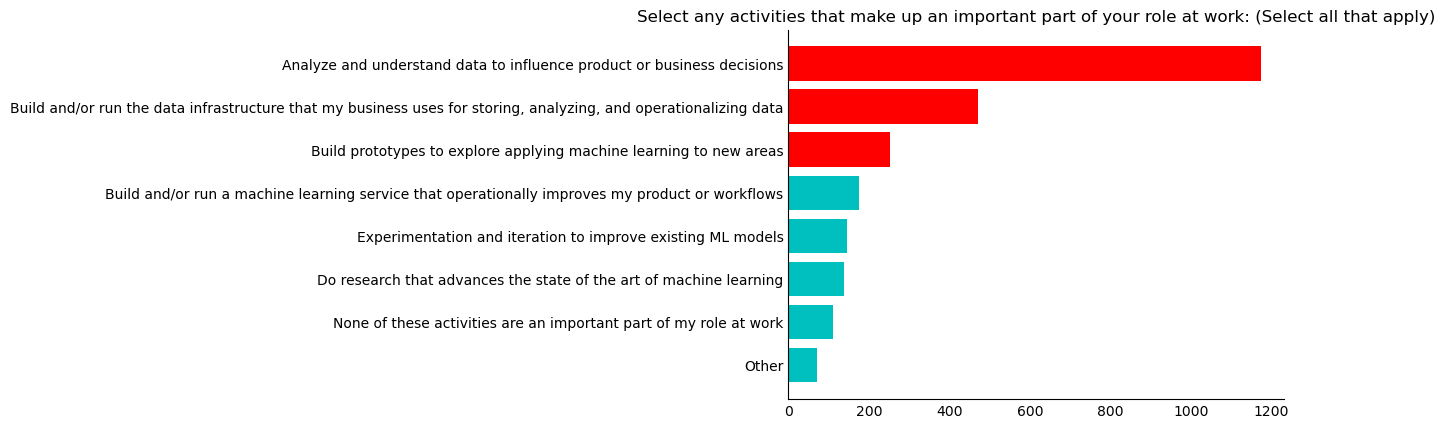

In [91]:
response_summary = summarize_survey_response(survey_data, "Q28")
plot_response_summary(question_table, response_summary, "Q28")

## 探索資料分析師使用的程式語言

> Q12: What programming languages do you use on a regular basis? (Select all that apply)

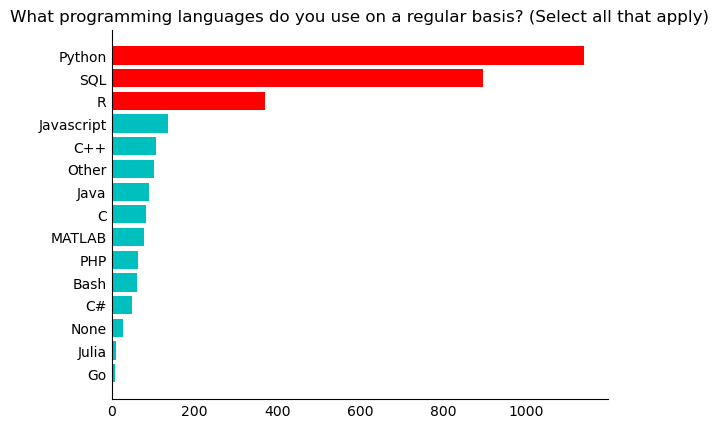

In [92]:
response_summary = summarize_survey_response(survey_data, "Q12")
plot_response_summary(question_table, response_summary, "Q12")

## 探索資料分析師使用的整合開發環境、純文字編輯器

> Q13: Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply)

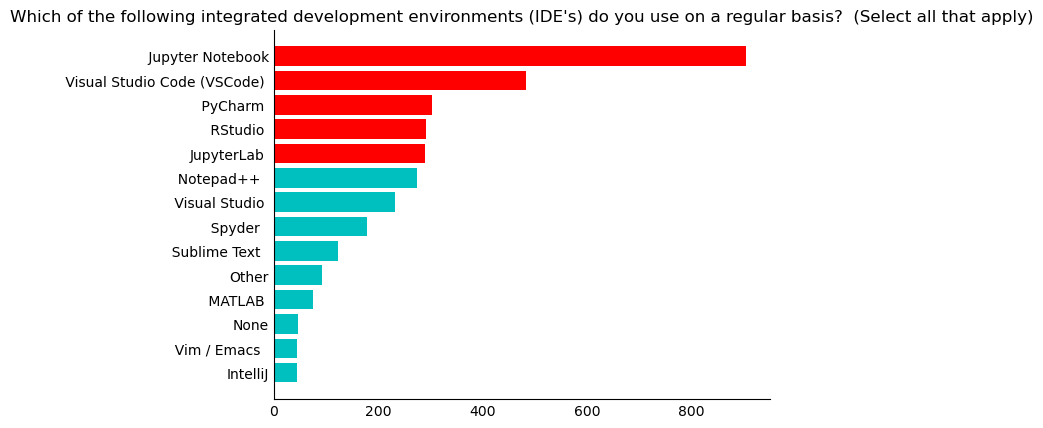

In [93]:
response_summary = summarize_survey_response(survey_data, "Q13")
plot_response_summary(question_table, response_summary, "Q13", n=5)

## 探索資料分析師使用的視覺化模組、套件

> Q15: Do you use any of the following data visualization libraries on a regular basis? (Select all that apply)

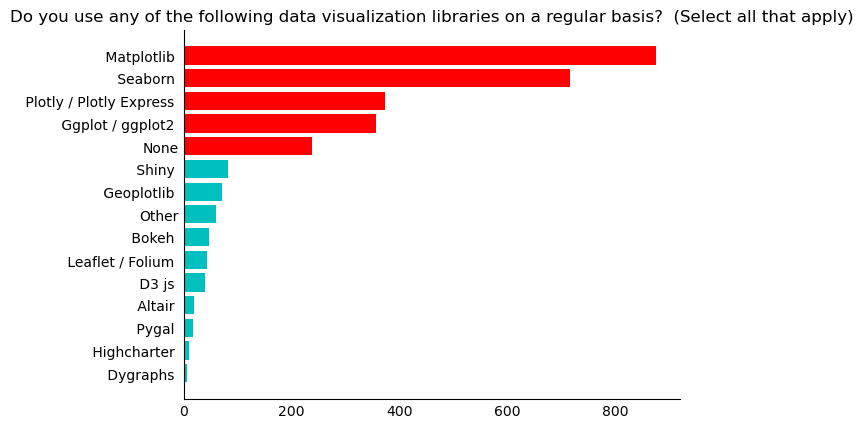

In [94]:
response_summary = summarize_survey_response(survey_data, "Q15")
plot_response_summary(question_table, response_summary, "Q15", n=5)

## 探索資料分析師使用的商業智能軟體

> Q36: Do you use any of the following business intelligence tools? (Select all that apply)

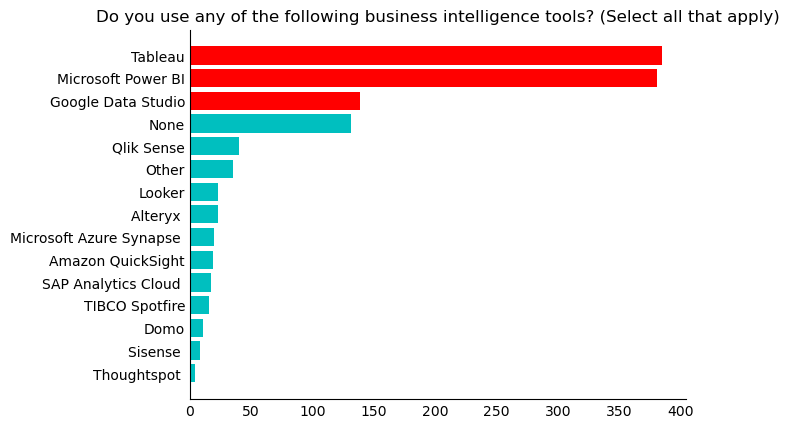

In [95]:
response_summary = summarize_survey_response(survey_data, "Q36")
plot_response_summary(question_table, response_summary, "Q36", n=3)

## 探索資料分析師使用的機器學習模組、套件

> Q17: Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)

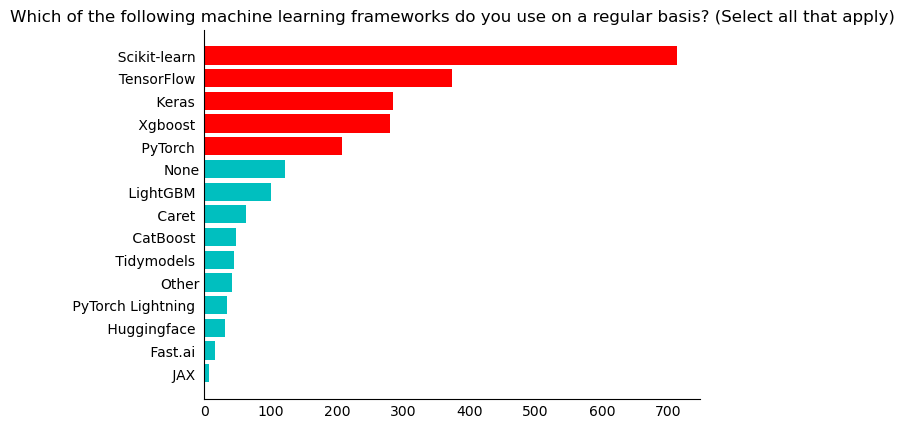

In [96]:
response_summary = summarize_survey_response(survey_data, "Q17")
plot_response_summary(question_table, response_summary, "Q17", n=5)

## 探索資料科學家使用的關聯式資料庫管理系統

> Q35: Do you use any of the following data products (relational databases, data warehouses, data lakes, or similar)? (Select all that apply)

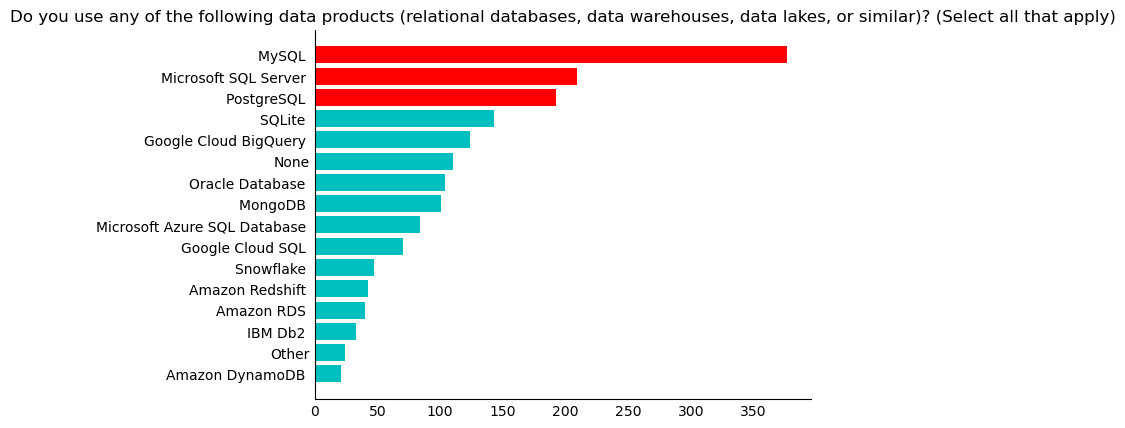

In [97]:
response_summary = summarize_survey_response(survey_data, "Q35")
plot_response_summary(question_table, response_summary, "Q35", n=3)